In [93]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # класс разбиения на данные для обучения и для проверки
from sklearn.utils import resample
# импортируем функции
from functions import generate_random_array, plot_true_vs_predicted,  Functions

In [94]:
# Исходные данные
# создаем объект класса Functions 
main_function = Functions()


# определяем количетсво строк для обучения
main_function.n_samples = 10000

# пределы варьирования признаков
main_function.limits = (-10, 10)

# определяем вид функции
main_function.set_function(main_function.trigonometric)


In [95]:
# Создаём ансамбль моделей
n_models = main_function.n_samples
models = [] # сюда будем модели загонять

for i in range(n_models):
    X_boot, y_boot = resample(X_train, y_train, random_state=42 + i)
    model = XGBRegressor(
        n_estimators=100,     
        max_depth=2,
        learning_rate=0.1,
        reg_alpha=0.5,
        reg_lambda=0.5,
        subsample=1.0,         
        random_state=42 + i
    )
    model.fit(X_boot, y_boot)
    models.append(model)

# Предсказание — усреднение
def predict_ensemble(X):
    preds = np.stack([m.predict(X) for m in models])
    return preds.mean(axis=0)





In [96]:
# генерим еще случайные данные, в этот раз много для более глубокой проверки модели
# генерим случайный массив признаков от -10 до +10
features = generate_random_array(1000, main_function.n_features, main_function.limits[0], main_function.limits[1], seed = 1488)
# Подставляем сгенерированный массив в функцию
target = main_function.function(*features.T)

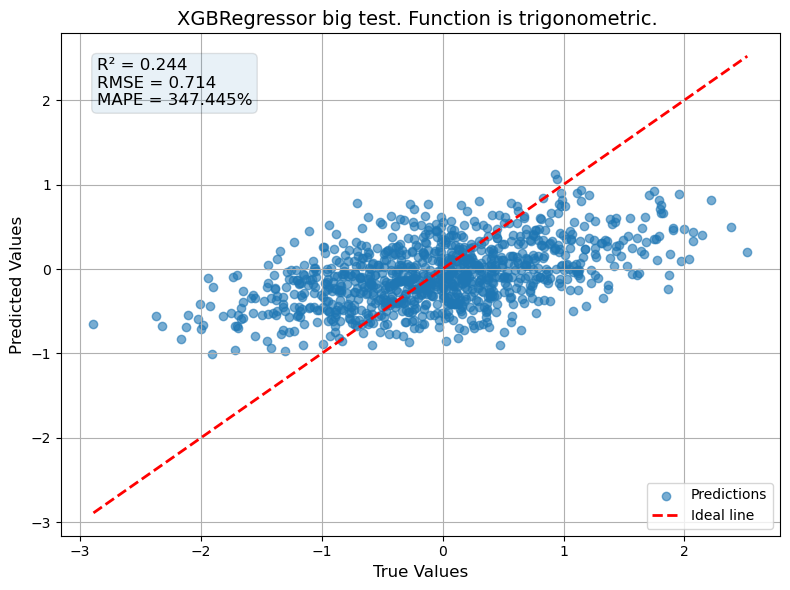

In [97]:
# Расчитываем отклик по данным для проверки
y_pred_big_test = predict_ensemble(features)
# посмотрим на результат
plot_true_vs_predicted (target, y_pred_big_test, title= f'XGBRegressor big test. Function is {main_function.function_name}. ')

In [98]:
#print(model.predict(np.array([[1,1,1]])))